In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the datasets
fake_news_data = pd.read_csv('/content/Fake.csv')
true_news_data = pd.read_csv('/content/True.csv')

# Explore the datasets
print(fake_news_data.head())
print(true_news_data.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [3]:
fake_news_data['label'] = 1  # 1 for fake news
true_news_data['label'] = 0  # 0 for true news
merged_data = pd.concat([fake_news_data, true_news_data])

# Drop unnecessary columns
merged_data = merged_data[['title', 'text', 'label']]

# Handle missing values if any
merged_data = merged_data.dropna()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(merged_data[['title', 'text']], merged_data['label'], test_size=0.2, random_state=42)

# Feature extraction, text vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['title'] + ' ' + X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['title'] + ' ' + X_test['text'])

# Train a simple model (Random Forest Classifier for example)
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9905345211581291
Confusion Matrix:
[[4199   48]
 [  37 4696]]


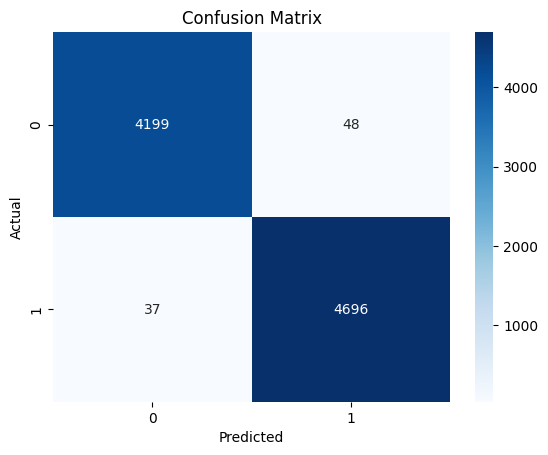

In [5]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

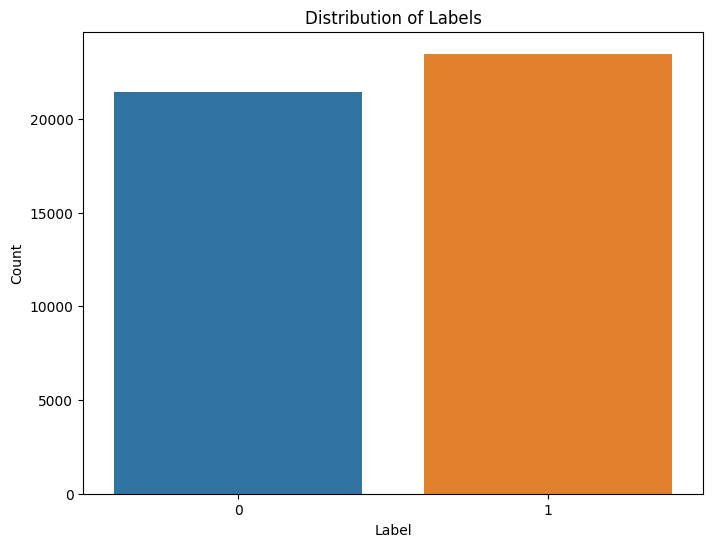

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=merged_data)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


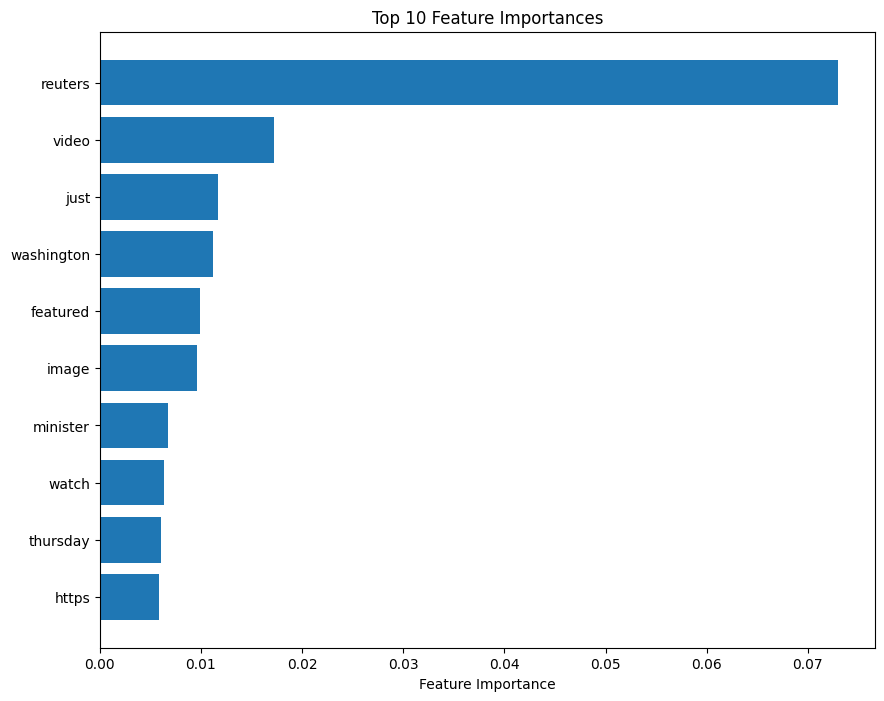

In [7]:
feature_names = tfidf_vectorizer.get_feature_names_out()

# Check if the model has the attribute 'feature_importances_'
if hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_

    # Get the indices of the most important features
    top_feature_indices = np.argsort(feature_importance)[-10:]  # Displaying top 10 features

    # Plotting the feature importances
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(top_feature_indices)), feature_importance[top_feature_indices], align='center')
    plt.yticks(range(len(top_feature_indices)), [feature_names[i] for i in top_feature_indices])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importances')
    plt.show()
else:
    print("The chosen model does not have the attribute 'feature_importances_'. Choose a different model.")